In [1]:
7 * 13  # SHIFT+ENTER

91

In [2]:
4 * Out[1]

364

In [3]:
%pwd

'/home/miki/Projects/talks/fun-with-pandas'

In [4]:
!ls

cart.csv   Makefile	README.html  slides	 taxi.csv.bz2  template.erb
CML.ipynb  playbook.md	README.md    stocks.csv  taxi.py       weather.db


In [5]:
log_dir = '/var/log'
files = !ls $log_dir
print(f'We have f{len(files)} files in {log_dir}')

We have f21 files in /var/log


In [6]:
import os

In [7]:
os.listdir?

Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str, bytes, or a path-like object.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method


# Some Title

* list
* of 
* items

[Search here](http://google.com)

Euler said $e^{i\pi}+1=0$

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('stocks.csv')

In [10]:
df

,Date,Symbol,Volume,Price
0,2014-02-06,AAPL,42,72.544289
1,2014-12-09,AAPL,95,109.349998
2,2015-07-28,INTC,30,28.440001
3,2015-09-09,AAPL,76,109.769997
4,2015-10-05,AAPL,21,109.070000
5,2016-01-12,GOOG,43,717.317017
6,2016-03-17,GOOG,37,736.000000
7,2016-08-22,INTC,64,35.119999
8,2017-05-01,GOOG,68,901.450012
9,2017-08-23,AMZN,34,954.200012


In [11]:
# GIGO

In [12]:
from os import path
csv_file = 'stocks.csv'
path.getsize(csv_file)

394

In [13]:
num_lines = 0
for line in open(csv_file):
    num_lines += 1
num_lines

14

In [14]:
lnum = 0
with open(csv_file) as fp:
    while lnum < 5:
        print(fp.readline())
        lnum += 1

Date,Symbol,Volume,Price

2014-02-06,AAPL,42,72.544289

2014-12-09,AAPL,95,109.349998

2015-07-28,INTC,30,28.440001

2015-09-09,AAPL,76,109.769997



In [15]:
! ls -lh $csv_file

-rw-r--r-- 1 miki miki 394 Jan 12 16:34 stocks.csv


In [16]:
! wc -l $csv_file

14 stocks.csv


In [17]:
! head -5 $csv_file

Date,Symbol,Volume,Price
2014-02-06,AAPL,42,72.544289
2014-12-09,AAPL,95,109.349998
2015-07-28,INTC,30,28.440001
2015-09-09,AAPL,76,109.769997


In [18]:
df = pd.read_csv(csv_file)

In [19]:
df.shape

(13, 4)

In [20]:
df.columns

Index(['Date', 'Symbol', 'Volume', 'Price'], dtype='object')

In [21]:
df.dtypes

Date       object
Symbol     object
Volume      int64
Price     float64
dtype: object

In [22]:
df = pd.read_csv(csv_file, parse_dates=['Date'])
df.dtypes

Date      datetime64[ns]
Symbol            object
Volume             int64
Price            float64
dtype: object

In [24]:
df.memory_usage().sum()

544

In [25]:
df['Symbol']

0     AAPL
1     AAPL
2     INTC
3     AAPL
4     AAPL
5     GOOG
6     GOOG
7     INTC
8     GOOG
9     AMZN
10    AAPL
11    AMZN
12    QCOM
Name: Symbol, dtype: object

In [26]:
df['Symbol'] == 'AAPL'

0      True
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
Name: Symbol, dtype: bool

In [27]:
mask = df['Symbol'] == 'AAPL'
df[mask]  # boolean indexing

,Date,Symbol,Volume,Price
0,2014-02-06,AAPL,42,72.544289
1,2014-12-09,AAPL,95,109.349998
3,2015-09-09,AAPL,76,109.769997
4,2015-10-05,AAPL,21,109.070000
10,2017-11-03,AAPL,21,171.119995


In [28]:
df[df['Symbol'] == 'AAPL']

,Date,Symbol,Volume,Price
0,2014-02-06,AAPL,42,72.544289
1,2014-12-09,AAPL,95,109.349998
3,2015-09-09,AAPL,76,109.769997
4,2015-10-05,AAPL,21,109.070000
10,2017-11-03,AAPL,21,171.119995


In [29]:
df[(df['Symbol'] == 'AAPL') & (df['Volume'] > 30)]

,Date,Symbol,Volume,Price
0,2014-02-06,AAPL,42,72.544289
1,2014-12-09,AAPL,95,109.349998
3,2015-09-09,AAPL,76,109.769997


In [30]:
# and -> &
# or -> |
# not -> ~

In [31]:
df[~mask]

,Date,Symbol,Volume,Price
2,2015-07-28,INTC,30,28.440001
5,2016-01-12,GOOG,43,717.317017
6,2016-03-17,GOOG,37,736.000000
7,2016-08-22,INTC,64,35.119999
8,2017-05-01,GOOG,68,901.450012
9,2017-08-23,AMZN,34,954.200012
11,2018-03-01,AMZN,10,1465.000000
12,2018-10-23,QCOM,53,63.570000


In [32]:
df[mask]['Volume']

0     42
1     95
3     76
4     21
10    21
Name: Volume, dtype: int64

In [33]:
df['Volume'][mask]

0     42
1     95
3     76
4     21
10    21
Name: Volume, dtype: int64

In [35]:
df.loc[3]

Date      2015-09-09 00:00:00
Symbol                   AAPL
Volume                     76
Price                  109.77
Name: 3, dtype: object

In [36]:
df.loc[3:7]

,Date,Symbol,Volume,Price
3,2015-09-09,AAPL,76,109.769997
4,2015-10-05,AAPL,21,109.070000
5,2016-01-12,GOOG,43,717.317017
6,2016-03-17,GOOG,37,736.000000
7,2016-08-22,INTC,64,35.119999


In [37]:
df.query('Symbol == "AAPL" & Volume > 30')

,Date,Symbol,Volume,Price
0,2014-02-06,AAPL,42,72.544289
1,2014-12-09,AAPL,95,109.349998
3,2015-09-09,AAPL,76,109.769997


In [38]:
df['Volume'] * df['Price']

0      3046.860138
1     10388.249810
2       853.200030
3      8342.519772
4      2290.470000
5     30844.631731
6     27232.000000
7      2247.679936
8     61298.600816
9     32442.800408
10     3593.519895
11    14650.000000
12     3369.210000
dtype: float64

In [39]:
df['Cost'] = df['Volume'] * df['Price']
df

,Date,Symbol,Volume,Price,Cost
0,2014-02-06,AAPL,42,72.544289,3046.860138
1,2014-12-09,AAPL,95,109.349998,10388.249810
2,2015-07-28,INTC,30,28.440001,853.200030
3,2015-09-09,AAPL,76,109.769997,8342.519772
4,2015-10-05,AAPL,21,109.070000,2290.470000
5,2016-01-12,GOOG,43,717.317017,30844.631731
6,2016-03-17,GOOG,37,736.000000,27232.000000
7,2016-08-22,INTC,64,35.119999,2247.679936
8,2017-05-01,GOOG,68,901.450012,61298.600816
9,2017-08-23,AMZN,34,954.200012,32442.800408


In [40]:
df['Volume'] * 3  # Broadcasting

0     126
1     285
2      90
3     228
4      63
5     129
6     111
7     192
8     204
9     102
10     63
11     30
12    159
Name: Volume, dtype: int64

In [41]:
(df['Volume'] * df['Price']).sum()

200599.74253599998

In [42]:
df.sum()

Volume       594.000000
Price       5472.951320
Cost      200599.742536
dtype: float64

In [43]:
df.describe()

,Volume,Price,Cost
count,13.000000,13.000000,13.000000
mean,45.692308,420.996255,15430.749426
std,24.509810,474.167141,17898.633527
min,10.000000,28.440001,853.200030
25%,30.000000,72.544289,3046.860138
50%,42.000000,109.769997,8342.519772
75%,64.000000,736.000000,27232.000000
max,95.000000,1465.000000,61298.600816


In [46]:
df.groupby('Symbol')['Volume'].sum()
# SELECT Symbol, SUM(Volume) FROM df GROUP BY Symbol

Symbol
AAPL    255
AMZN     44
GOOG    148
INTC     94
QCOM     53
Name: Volume, dtype: int64

In [48]:
df.groupby(['Symbol', 'Date'])['Volume'].sum()

Symbol  Date      
AAPL    2014-02-06    42
        2014-12-09    95
        2015-09-09    76
        2015-10-05    21
        2017-11-03    21
AMZN    2017-08-23    34
        2018-03-01    10
GOOG    2016-01-12    43
        2016-03-17    37
        2017-05-01    68
INTC    2015-07-28    30
        2016-08-22    64
QCOM    2018-10-23    53
Name: Volume, dtype: int64

In [49]:
%matplotlib inline

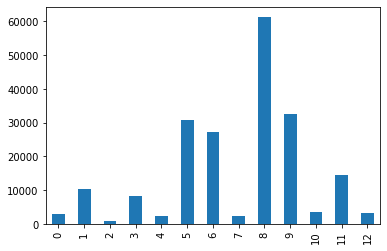

In [51]:
df['Cost'].plot.bar();

In [53]:
df.index

RangeIndex(start=0, stop=13, step=1)

In [54]:
df.index = df['Date']
df.index

DatetimeIndex(['2014-02-06', '2014-12-09', '2015-07-28', '2015-09-09',
               '2015-10-05', '2016-01-12', '2016-03-17', '2016-08-22',
               '2017-05-01', '2017-08-23', '2017-11-03', '2018-03-01',
               '2018-10-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

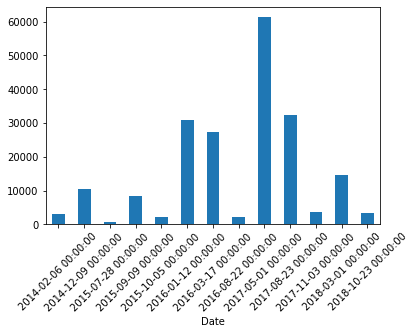

In [56]:
df['Cost'].plot.bar(rot=45);

In [58]:
df.iloc[3]

Date      2015-09-09 00:00:00
Symbol                   AAPL
Volume                     76
Price                  109.77
Cost                  8342.52
Name: 2015-09-09 00:00:00, dtype: object

In [60]:
df.loc['2018-10-23']

Date      2018-10-23 00:00:00
Symbol                   QCOM
Volume                     53
Price                   63.57
Cost                  3369.21
Name: 2018-10-23 00:00:00, dtype: object

In [62]:
df.loc['2018']

,Date,Symbol,Volume,Price,Cost
Date,,,,,
2018-03-01,2018-03-01,AMZN,10,1465.00,14650.00
2018-10-23,2018-10-23,QCOM,53,63.57,3369.21
